# ✅ TECHCRUSH DATA SCIENCE TRACK CAPSTONE PROJECT 

#### GROUP NAME :  TEAM DATAVERSE

##### CASE STUDY 2
##### Healthcare – Early Detection of Diabetes
- ###### Background:
A mobile health clinic wants to pre-screen patients for diabetes using basic health indicators to reduce hospital crowding and focus on at-risk individuals.

- ###### Problem Statement:
Use EDA to uncover factors that greatly influence the risk of diabetes. Develop a classification model to predict if a person has diabetes based on attributes like BMI, glucose levels, insulin levels, and age.


#### STEP ONE :
#### Import all necessary Libraries 

In [5]:
import numpy as np
import pandas as pd
import seaborn as sns
sns.set(style="whitegrid")
import matplotlib.pyplot as plt
from scipy.stats import zscore
from sklearn.feature_selection import mutual_info_classif
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import roc_curve, auc

import warnings
warnings.filterwarnings("ignore")

#### STEP TWO :
#### Import the dataset and Inspect the data

In [7]:
df = pd.read_csv("diabetes.csv")

df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [8]:
df.head() # View the first 5 rows

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [9]:
df.tail() # View the last 5 rows 

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1
767,1,93,70,31,0,30.4,0.315,23,0


In [10]:
df.shape #  Total Rows and colums 

(768, 9)

In [11]:
df.info() # shows the full overview of the data 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [12]:
df.describe() # statistical overviews 

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [13]:
df.value_counts() # count unique values 

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin  BMI   DiabetesPedigreeFunction  Age  Outcome
0            57       60             0              0        21.7  0.735                     67   0          1
             67       76             0              0        45.3  0.194                     46   0          1
5            103      108            37             0        39.2  0.305                     65   0          1
             104      74             0              0        28.8  0.153                     48   0          1
             105      72             29             325      36.9  0.159                     28   0          1
                                                                                                            ..
2            84       50             23             76       30.4  0.968                     21   0          1
             85       65             0              0        39.6  0.930                     27   0          1
      

In [14]:
df.isnull().sum() # check for explicit missing values 

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

#### Step Three 
##### Handling Missing Data 

In [16]:
# Check for implicit missing values (e.g., 0 in Glucose, BMI, etc.) excluding outcome 
zero_columns = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']
for col in zero_columns:
    print(f"Zero values in {col}:", (df[col] == 0).sum())

Zero values in Glucose: 5
Zero values in BloodPressure: 35
Zero values in SkinThickness: 227
Zero values in Insulin: 374
Zero values in BMI: 11


In [17]:
# Replace 0 with NaN for relevant columns
for col in zero_columns:
    df[col] = df[col].replace(0, pd.NA)


In [18]:
# Check missing values again
df.isnull().sum()

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

In [19]:
# Impute missing values with mean
for col in zero_columns:
    df[col].fillna(df[col].mean(), inplace=True)

In [20]:
# Verify no more missing values
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

- While handling the missing values we assume zeros are missing data
- Then we fill the missing value with the mean

#### Step 4 
##### Carryout univariate and bivariate analysis

#### Target: Outcome (0 = Non-diabetic, 1 = Diabetic)

### Univariate Analysis 
- Univariate analysis helps us understand the distribution, central tendencies, and spread of individual variables.
- By exploring the summary statistics and Distribution of numerical variables we can achieve this.
- It also helps in identifying potential outliers.
- Using of histogram and boxplot for numerical distribution


Summary Statistics:
        Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  121.686763      72.405184      29.153420  155.548223   
std       3.369578   30.435949      12.096346       8.790942   85.021108   
min       0.000000   44.000000      24.000000       7.000000   14.000000   
25%       1.000000   99.750000      64.000000      25.000000  121.500000   
50%       3.000000  117.000000      72.202592      29.153420  155.548223   
75%       6.000000  140.250000      80.000000      32.000000  155.548223   
max      17.000000  199.000000     122.000000      99.000000  846.000000   

              BMI  DiabetesPedigreeFunction         Age     Outcome  
count  768.000000                768.000000  768.000000  768.000000  
mean    32.457464                  0.471876   33.240885    0.348958  
std      6.875151                  0.331329   11.760232    0.476951  
min     18.20

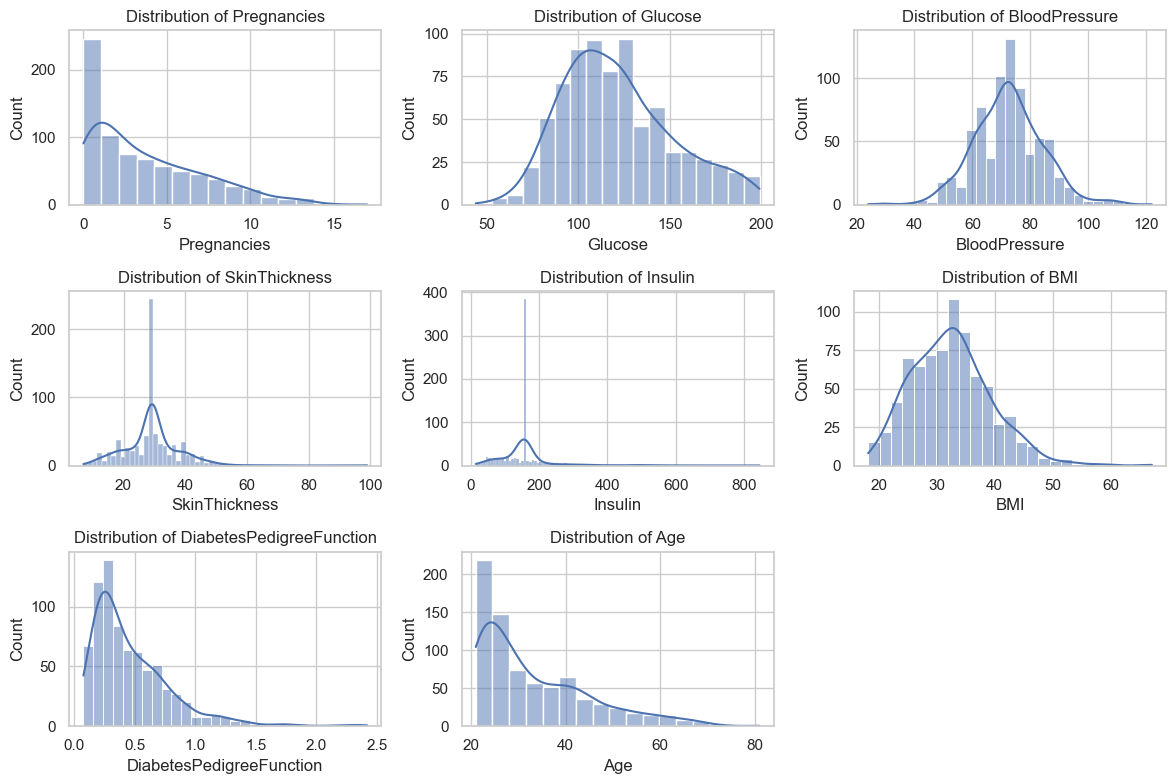

In [25]:
# Summary statistics
print("\nSummary Statistics:\n", df.describe())

# Distribution of numerical variables using histogram 
plt.figure(figsize=(12, 8))
for i, col in enumerate(df.columns[:-1], 1):  # Exclude Outcome
    plt.subplot(3, 3, i)
    sns.histplot(df[col], kde=True)
    plt.title(f'Distribution of {col}')
plt.tight_layout()
plt.show() 

<Figure size 1500x1000 with 0 Axes>

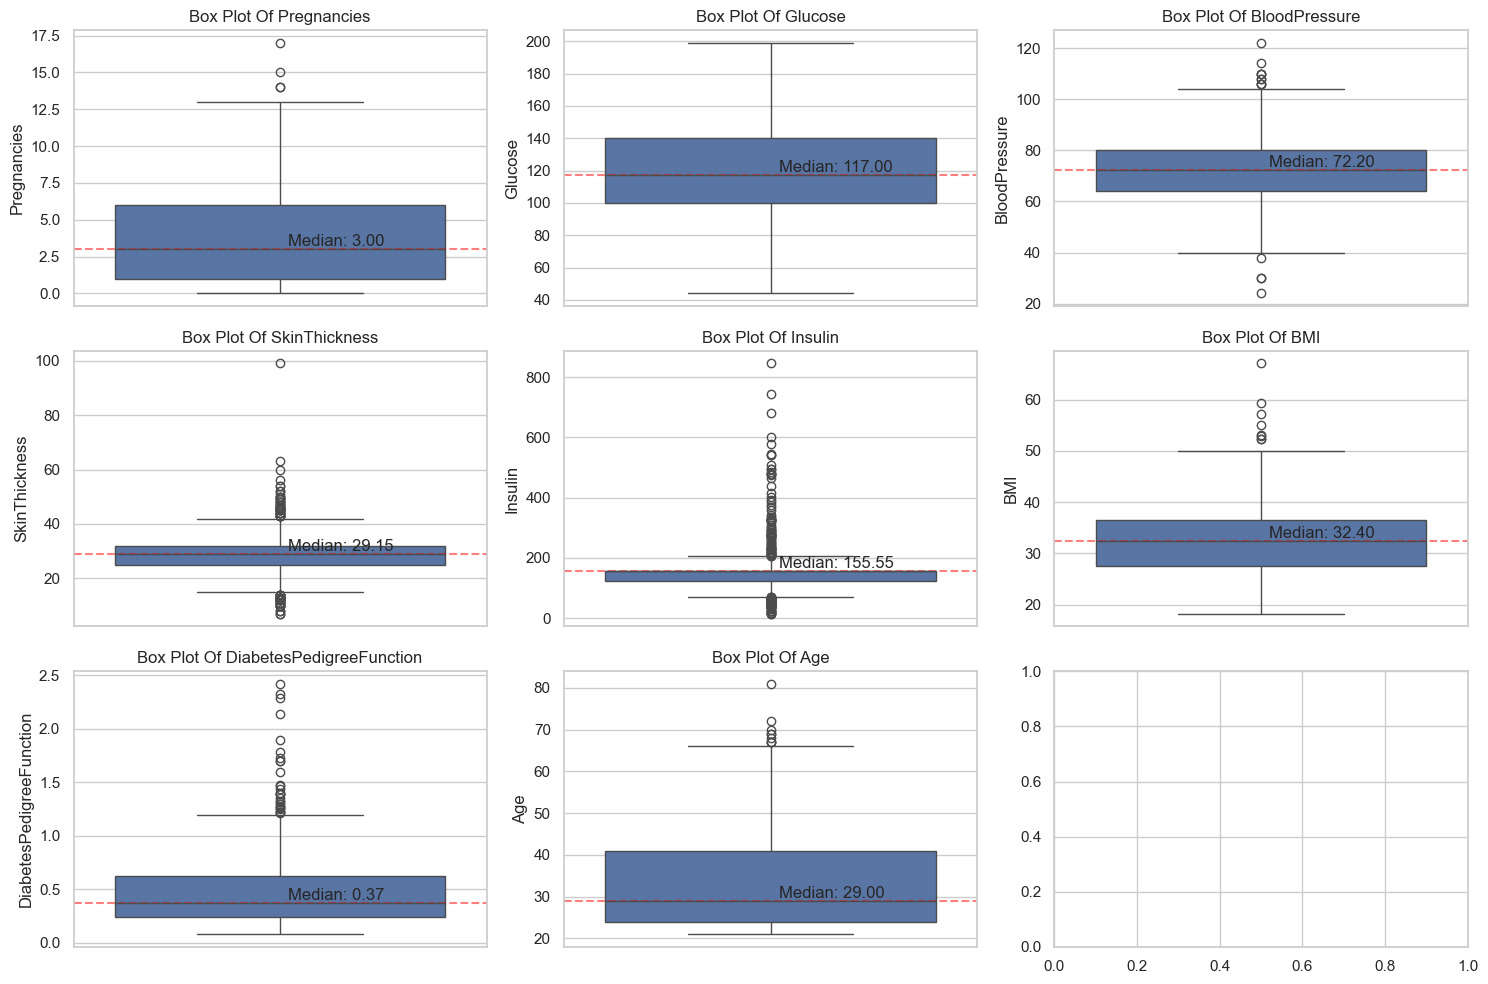

In [26]:
# Distribution of numerical variables using boxplot
plt.figure(figsize=(15, 10))
numerical_cols = df.columns[:-1]  # exclude Outcome

# Create a single figure with all subplots at once
fig, axes = plt.subplots(3, 3, figsize=(15, 10))
axes = axes.flatten()  # Convert 2D array of axes to 1D for easier indexing

for i, col in enumerate(numerical_cols):
    if i < len(axes):  # Ensure we don't exceed available subplots
        sns.boxplot(y=df[col], ax=axes[i])
        axes[i].set_title(f'Box Plot Of {col}')
        
        # statistical annotations to provide more context
        median = df[col].median()
        axes[i].axhline(median, color='red', linestyle='--', alpha=0.5)
        axes[i].text(0.02, median, f'Median: {median:.2f}', 
                    verticalalignment='bottom', horizontalalignment='left')

plt.tight_layout()
plt.show()

#### Bivariate Analysis : Comparing each features by the outcome 

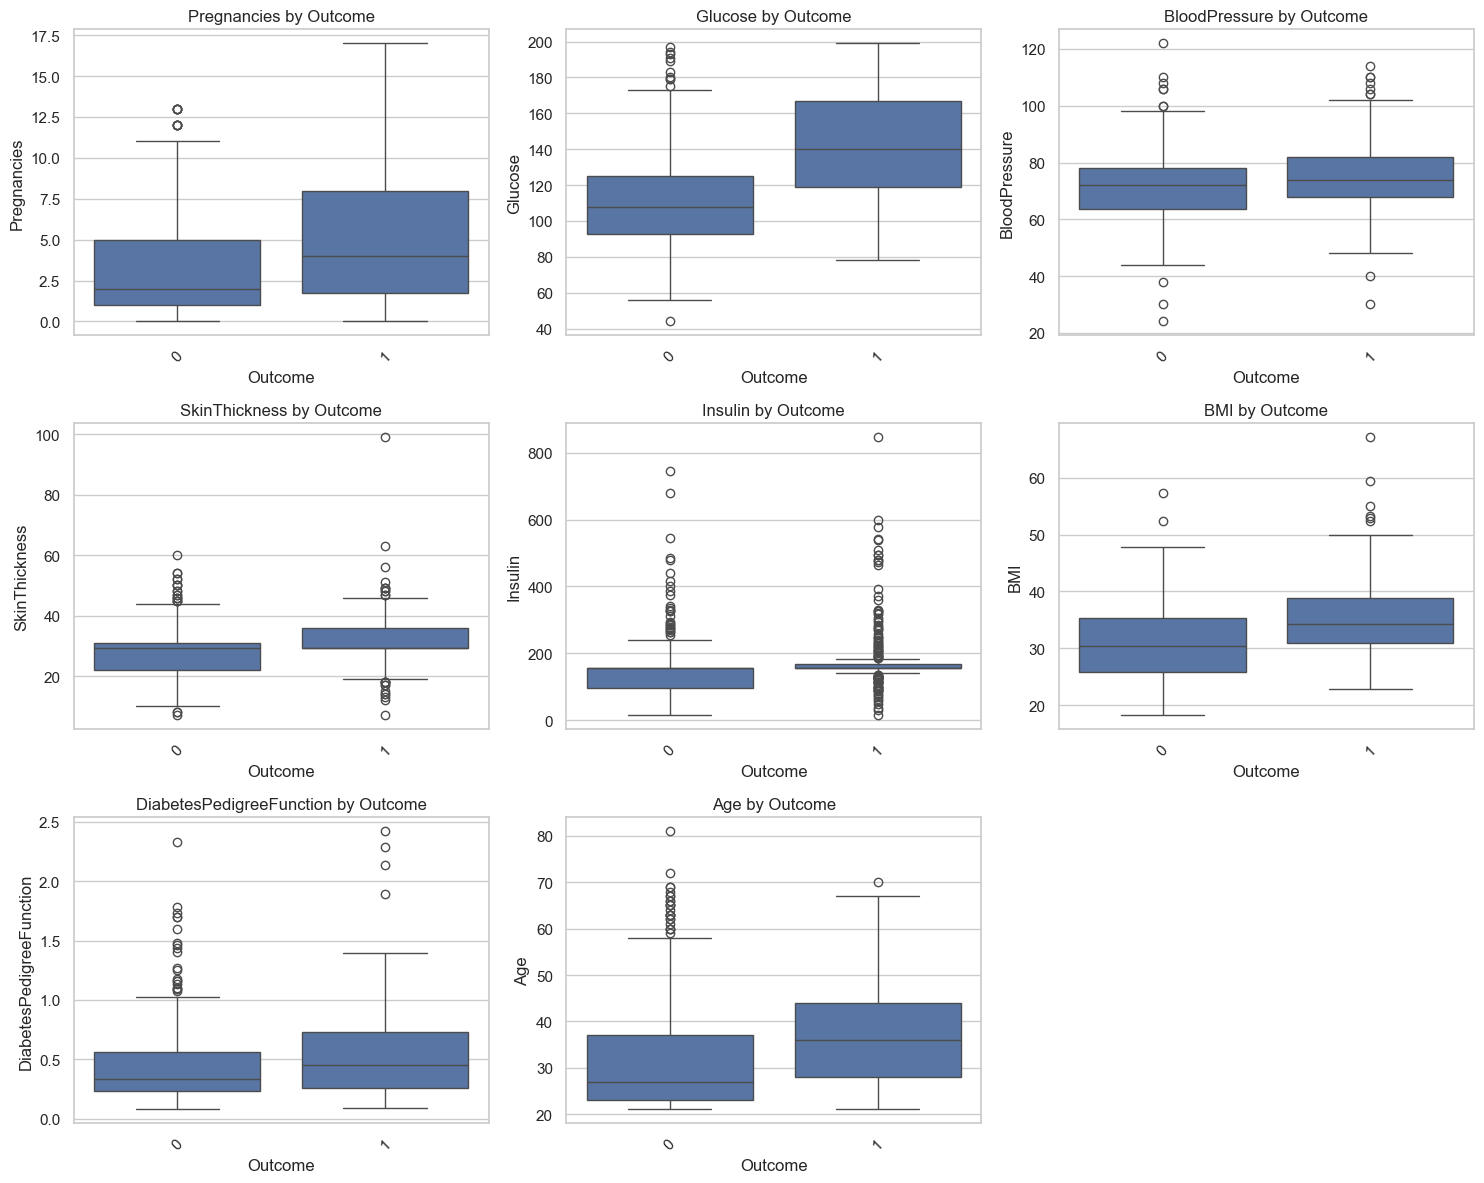

In [28]:
# Create boxplots for numerical columns by outcome
numerical_cols = df.columns[:-1]
num_cols = len(numerical_cols)

# Calculate optimal grid dimensions
n_rows = (num_cols + 2) // 3  # Ceiling division to ensure enough space
n_cols = min(3, num_cols)

# Create a single figure for all subplots
plt.figure(figsize=(15, 4 * n_rows))

# Create subplots in a loop
for i, col in enumerate(numerical_cols):
    plt.subplot(n_rows, n_cols, i+1)
    sns.boxplot(x='Outcome', y=col, data=df)
    plt.title(f'{col} by Outcome')
    plt.xticks(rotation=45)  # Rotate x labels if needed
plt.tight_layout()
plt.show()

Outcome
0    500
1    268
Name: count, dtype: int64
Outcome
0    65.104167
1    34.895833
Name: proportion, dtype: float64


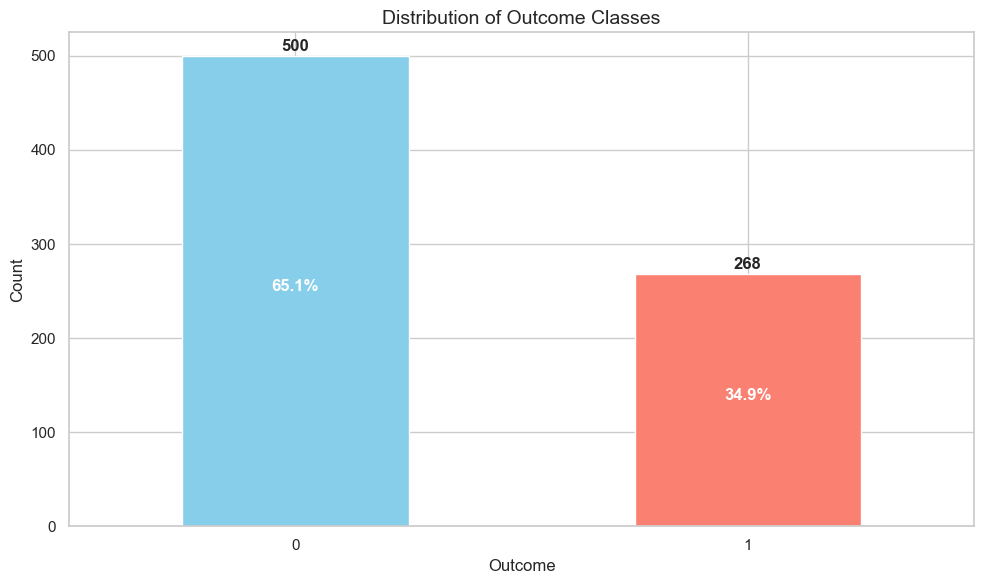

In [29]:
# Confirming target distribution number to show the Imbalance of the Outcome
print(df['Outcome'].value_counts())
print(df['Outcome'].value_counts(normalize=True) * 100) # For percentages

# Adding visualization for the Outcome imbalance
plt.figure(figsize=(10, 6))
ax = df['Outcome'].value_counts().plot(kind='bar', color=['skyblue', 'salmon'])
plt.title('Distribution of Outcome Classes', fontsize=14)
plt.xlabel('Outcome', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(rotation=0)

# Adding count labels on top of each bar
for i, count in enumerate(df['Outcome'].value_counts()):
    ax.text(i, count + 5, str(count), ha='center', fontweight='bold')
    
# Adding percentage labels
for i, percentage in enumerate(df['Outcome'].value_counts(normalize=True) * 100):
    ax.text(i, df['Outcome'].value_counts()[i]/2, f'{percentage:.1f}%', 
            ha='center', color='white', fontweight='bold')

plt.tight_layout()
plt.show()

##### Grouping patients based on age and computes average glucose for diabetic vs. non-diabetic individuals.

In [31]:
# Define age groups separately
bins = [20, 30, 40, 50, 60, 70]  # Age ranges
labels = ["20-30", "30-40", "40-50", "50-60", "60-70"]  # Group names

# Create a temporary grouped variable
age_glucose_grouped = df.copy()
age_glucose_grouped["Age Group"] = pd.cut(df["Age"], bins=bins, labels=labels, include_lowest=True)

# Group by Age Group and Outcome while computing average glucose levels
age_glucose_summary = age_glucose_grouped.groupby(["Age Group", "Outcome"])["Glucose"].mean().reset_index()

# Display grouped data
print(age_glucose_summary)

  Age Group  Outcome     Glucose
0     20-30        0  108.094986
1     20-30        1  140.322222
2     30-40        0  114.148148
3     30-40        1  140.601142
4     40-50        0  108.000000
5     40-50        1  139.713856
6     50-60        0  124.565217
7     50-60        1  153.451613
8     60-70        0  130.666667
9     60-70        1  155.285714


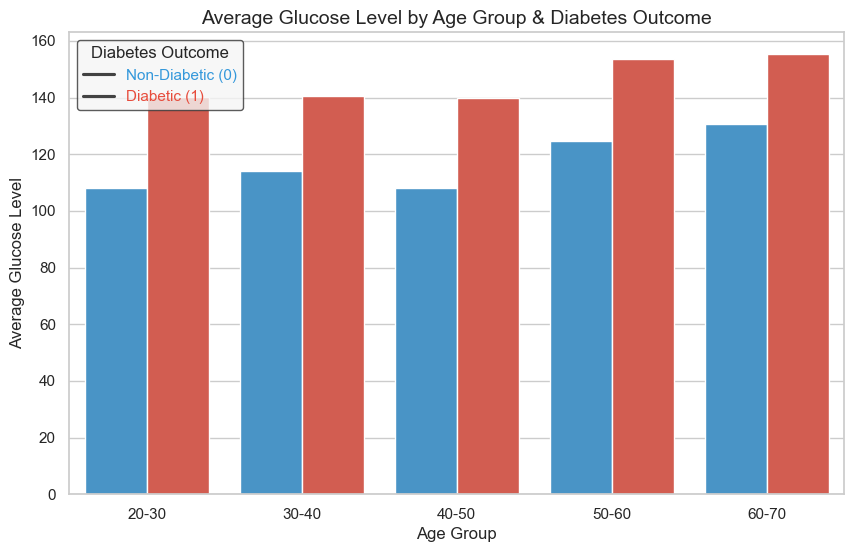

In [32]:
plt.figure(figsize=(10, 6))
sns.barplot(data=age_glucose_summary, x="Age Group", y="Glucose", hue="Outcome", palette=["#3498db", "#e74c3c"])

# Customize plot
plt.title("Average Glucose Level by Age Group & Diabetes Outcome", fontsize=14)
plt.xlabel("Age Group", fontsize=12)
plt.ylabel("Average Glucose Level", fontsize=12)

# Enhance legend styling
legend = plt.legend(title="Diabetes Outcome", labels=["Non-Diabetic (0)", "Diabetic (1)"])
legend.get_frame().set_facecolor('#f5f5f5')  # Light grey background
legend.get_frame().set_edgecolor('#333')  # Darker border
legend.get_texts()[0].set_color("#3498db")  # Blue for Non-Diabetic
legend.get_texts()[1].set_color("#e74c3c")  # Red for Diabetic

plt.show()

#### Step 5
#### Insight & Observation
- Features like Glucose and BMI shows moderate right-skewed distributions.
- The Outcome variable is imbalanced (more non-diabetic than diabetic cases).
- Pregnancies, Age, DiabetesPdigreeFunction, and Insulin are highly right-skewed.
- BloodPressure is close to Normal distribution .
- Glucose: Diabetic patients tend to have higher glucose levels.
- Pregnancies : Average pregnant patients tends to be diabetic.

#### Key Insight 
- ##### Can high Glucose level cause diabetes ?
  Yes, consistently high glucose levels (also known as hyperglycemia) in an individual can lead to diabetes. Diabetes occurs when the body either doesn't produce enough insulin or can't properly use the insulin it produces, resulting in glucose building up in the bloodstream. This buildup is a key characteristic of diabetes. 
- ##### How High Glucose Leads to Diabetes:
1. Lack of Insulin:
If the pancreas doesn't produce enough insulin, or if the body becomes resistant to its effects, glucose can't enter cells for energy and instead accumulates in the blood. 
2. Insulin Resistance:
In type 2 diabetes, the body's cells become resistant to insulin, meaning they don't respond properly to its signal to take up glucose from the blood. 
3. Persistent Hyperglycemia:
Over time, consistently high blood sugar levels can damage tissues and organs, leading to various health complications, including nerve damage, kidney damage, and heart disease.

##### In Summary: Diabetes is a condition where blood sugar (glucose) levels are chronically elevated due to problems with insulin production or use, and this high glucose is a defining feature of the disease.

#### Possible Solution To Problem in Key Insight
The most effective way to manage high glucose levels in diabetes involves a combination of lifestyle modifications, medication, and, in some cases, insulin therapy. A healthy diet, regular exercise, and consistent blood sugar monitoring are crucial. Medications like metformin and other glucose-lowering drugs may be prescribed, and insulin therapy may be necessary for some individuals, particularly those with type 1 diabetes and certain individuals with type 2 diabetes. 
##### Elaboration:
##### 1. Lifestyle Modifications:
- Healthy Eating:
Focus on a diet rich in fruits, vegetables, lean proteins, and whole grains, while limiting saturated fats, refined carbohydrates, and sugary drinks. 
Regular Exercise:
Aim for at least 30 minutes of moderate-intensity exercise most days of the week. Exercise helps your body use insulin more effectively and lowers blood sugar levels. 
- Weight Management:
Maintaining a healthy weight can improve insulin sensitivity and help manage blood sugar levels. 
Consistent Blood Sugar Monitoring:
Regularly checking your blood glucose levels helps you understand how your body responds to different foods, activities, and medications. 
##### 2. Medications:
- Metformin:
This oral medication is often the first-line treatment for type 2 diabetes, helping to improve insulin sensitivity and reduce glucose production by the liver. 
Other Glucose-Lowering Medications:
Various medications, such as SGLT2 inhibitors and GLP-1 receptor agonists, may be prescribed to further manage blood sugar levels. 
- Insulin Therapy:
Some individuals with type 1 diabetes and certain individuals with type 2 diabetes require insulin therapy to manage blood sugar levels. Insulin helps the body use glucose for energy. 
##### 3. Other Important Factors:
- Managing Stress: High stress levels can negatively impact blood sugar control. 
- Getting Enough Sleep: Adequate sleep is essential for maintaining overall health and can positively influence blood sugar levels. 
- Hydration: Drinking plenty of water can help flush out excess sugar from the body. 
- Seeking Professional Guidance: Consult with a healthcare professional, such as a doctor or certified diabetes educator, to develop a personalized diabetes management plan.


#### Step 6
- ##### Detecting and Handling Outliers

##### 1. Detect Outliers Using Z-Scores
A Z-score measures how far a value is from the mean—values beyond ±3 are potential outliers.


In [38]:
# Compute Z-scores for all numerical columns
z_scores = df.select_dtypes(include=np.number).apply(zscore)

# Check how many outliers exist in each column
outlier_counts = (abs(z_scores) > 3).sum()
print(outlier_counts)

Pregnancies                  4
Glucose                      0
BloodPressure                8
SkinThickness                4
Insulin                     19
BMI                          5
DiabetesPedigreeFunction    11
Age                          5
Outcome                      0
dtype: int64


##### 2. Detect Outliers Using Interquartile Range (IQR)
The IQR method helps identify extreme values:


In [40]:
# Function to detect outliers using IQR
def detect_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] < lower_bound) | (df[column] > upper_bound)]

# Example: Checking outliers in 'Glucose'
outliers_glucose = detect_outliers_iqr(df, "Glucose")
print(outliers_glucose)

Empty DataFrame
Columns: [Pregnancies, Glucose, BloodPressure, SkinThickness, Insulin, BMI, DiabetesPedigreeFunction, Age, Outcome]
Index: []


##### 3. Handling Outliers
You can either:
- Remove outliers (since they may likely distort the analysis).
- Cap extreme values at upper/lower bounds to retain them without bias.


In [42]:
# Removing outliers using IQR
for col in df.select_dtypes(include=np.number).columns:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Removing extreme outliers
    df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]

#### Step 7
#### Feature Selection
We’ll approach this in three ways:
- Correlation Analysis – Checking relationships between features.
- Statistical Tests – Using techniques like mutual information.
- Feature Importance via ML Models – Determining key predictors using algorithms.


##### 1. Correlation Analysis (Feature Relationships)
Let’s visualize how strongly each feature is related to the Outcome (Diabetes or Not)


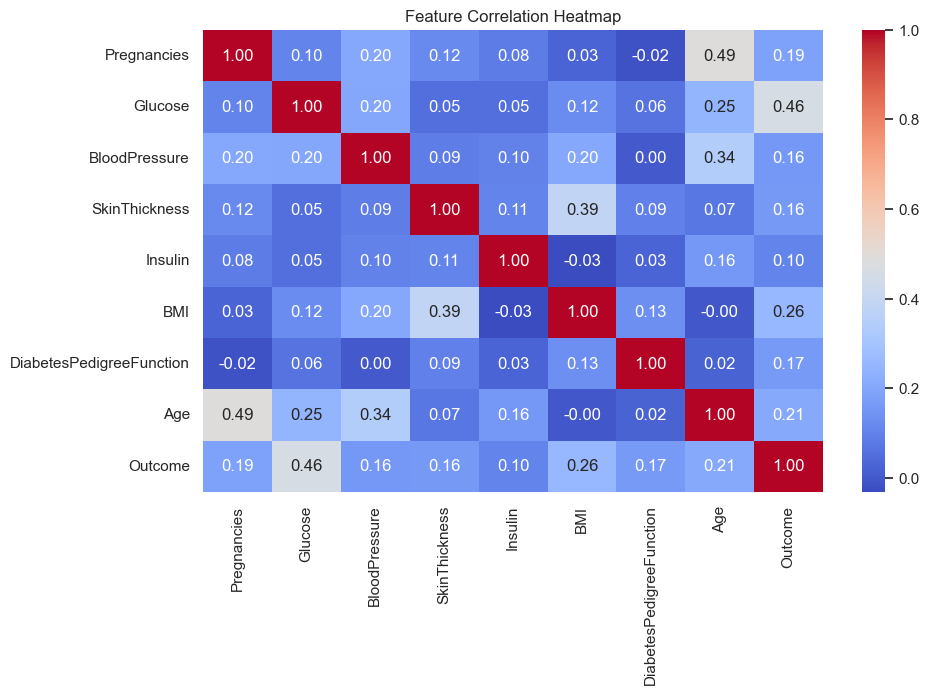

In [45]:
# Compute correlation matrix
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Feature Correlation Heatmap")
plt.show()

#### Key Insights:
- Glucose has the strongest positive correlation with the Outcome (0.46), indicating it's a critical predictor.
- BMI and Age also have noticeable positive correlations (~0.26 and ~0.21) with diabetes.
- Pregnancies shows a smaller but meaningful correlation (0.19), likely reflecting risk increase with repeated pregnancies, but higher correlation with age (0.49)
- Other features like BloodPressure, SkinThickness, and Insulin show weak correlations with the target.



##### 2. Statistical Feature Selection (Using Mutual Information)
Mutual information measures how much knowledge about one variable helps predict another.

- This will show which features provide the most information for predicting diabetes


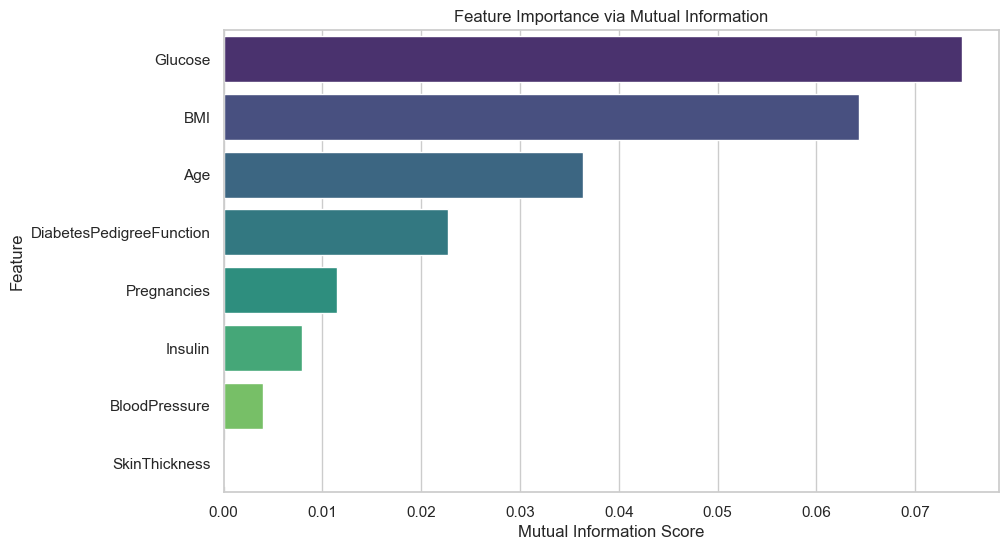

In [49]:
# Selecting features excluding target variable 'Outcome'
X = df.drop(columns=["Outcome"])
y = df["Outcome"]

# Compute feature importance scores
mi_scores = mutual_info_classif(X, y)
mi_scores = pd.Series(mi_scores, index=X.columns).sort_values(ascending=False)

# Plot feature importance
plt.figure(figsize=(10, 6))
sns.barplot(x=mi_scores, y=mi_scores.index, palette="viridis")
plt.title("Feature Importance via Mutual Information")
plt.xlabel("Mutual Information Score")
plt.ylabel("Feature")
plt.show()

##### 3. Feature Importance via Random Forest
This identifies key predictive features based on a machine learning model


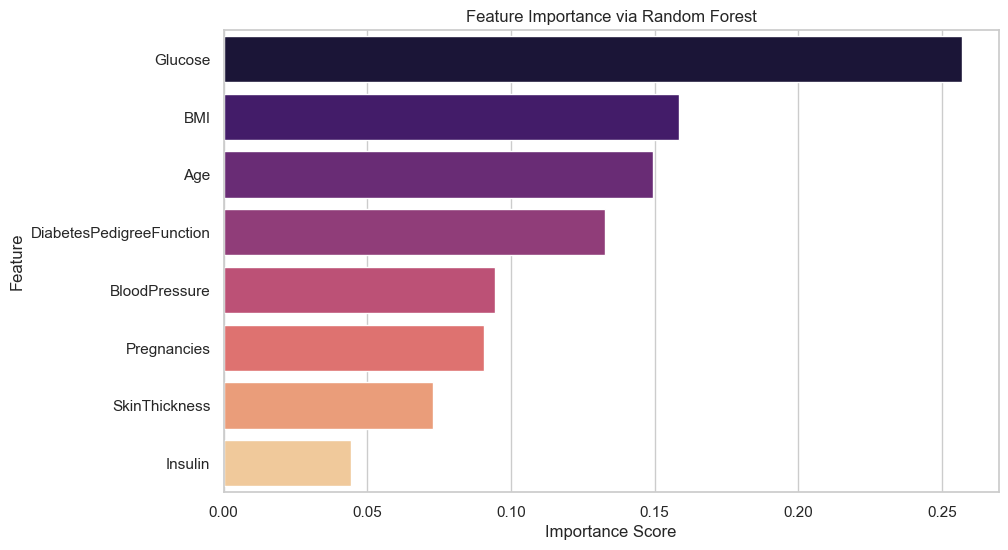

In [51]:
# Train a Random Forest model
rf = RandomForestClassifier()
rf.fit(X, y)

# Extract feature importance
feature_importance = pd.Series(rf.feature_importances_, index=X.columns).sort_values(ascending=False)

# Visualize feature importance
plt.figure(figsize=(10, 6))
sns.barplot(x=feature_importance, y=feature_importance.index, palette="magma")
plt.title("Feature Importance via Random Forest")
plt.xlabel("Importance Score")
plt.ylabel("Feature")
plt.show()

#### Step 8: Data Transformation
We’ll apply the following transformations:
- Scaling Numerical Variables – Standardizing values so no feature dominates.
- Encoding Categorical Variables – Converting diabetes outcome into machine-readable format.
- Feature Engineering – Creating new variables to improve accuracy.


##### 1. Scaling Numerical Features
Since our features vary in range (e.g., age vs. glucose levels), scaling ensures uniformity:
-  This keeps values consistent across different magnitudes, improving model accuracy.


In [54]:
# Select numerical features for scaling
numeric_cols = ["Glucose", "BloodPressure", "SkinThickness", "Insulin", "BMI", "Age", "DiabetesPedigreeFunction"]

# Apply Standard Scaling
scaler = StandardScaler()
df[numeric_cols] = scaler.fit_transform(df[numeric_cols])
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,0.979701,-0.043752,1.157131,0.312677,0.325847,0.989168,1.343625,1
1,1,-1.276737,-0.612157,0.028475,0.312677,-0.867866,-0.201610,-0.273146,0
2,8,2.233277,-0.801625,0.057335,0.312677,-1.430616,1.183316,-0.188052,1
3,1,-1.133471,-0.612157,-1.100181,-3.136386,-0.612070,-0.995462,-1.124078,0
5,5,-0.166426,0.145716,0.057335,0.312677,-1.038396,-0.848772,-0.358239,0


##### 2. Encoding Categorical Variables
Since "Outcome" is categorical, we convert it into a binary machine-learning format:
-  This ensures the machine learning model correctly interprets diabetes classification.


In [56]:
# Convert Outcome column to 0 (Non-Diabetic) & 1 (Diabetic)
encoder = LabelEncoder()
df["Outcome"] = encoder.fit_transform(df["Outcome"])

# Verify encoding
df["Outcome"].unique()

array([1, 0], dtype=int64)

##### 3. Feature Engineering
Let’s create a new feature to refine predictions—BMI x Age interaction
-  This enhances prediction accuracy by capturing age-related weight impact.


In [58]:
# Create new variable combining BMI and Age (helpful in risk assessment)
df["BMI_Age_Interaction"] = df["BMI"] * df["Age"]

# Display new feature
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,BMI_Age_Interaction
0,6,0.979701,-0.043752,1.157131,0.312677,0.325847,0.989168,1.343625,1,0.437816
1,1,-1.276737,-0.612157,0.028475,0.312677,-0.867866,-0.201610,-0.273146,0,0.237054
2,8,2.233277,-0.801625,0.057335,0.312677,-1.430616,1.183316,-0.188052,1,0.269031
3,1,-1.133471,-0.612157,-1.100181,-3.136386,-0.612070,-0.995462,-1.124078,0,0.688014
5,5,-0.166426,0.145716,0.057335,0.312677,-1.038396,-0.848772,-0.358239,0,0.371994


#### Step 9: Model Building
We’ll go through:
- Splitting the Data – Separating into training and testing sets.
- Training Multiple Models – Comparing different classifiers.
- Evaluating Performance – Measuring accuracy, precision, and recall.


##### 1. Splitting the Data
- We divide the dataset into training (used for learning) and testing (used for evaluation).
-  This ensures the model learns patterns and is tested on unseen data.


In [61]:
# Features (X) and target variable (y)
X = df.drop(columns=["Outcome"])
y = df["Outcome"]

# Split into training (80%) and testing (20%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Display dataset shapes
print(f"Training Set: {X_train.shape}, Testing Set: {X_test.shape}")

Training Set: (369, 9), Testing Set: (93, 9)


##### 2. Training Multiple Models
We’ll experiment with different classifiers:
- Logistic Regression
- Random Forest
- Support Vector Machine (SVM)
-  This tests various machine learning approaches for diabetes prediction.


In [63]:
# Initialize models
models = {
    "Logistic Regression": LogisticRegression(),
    "Random Forest": RandomForestClassifier(),
    "SVM": SVC()
}

# Train models
for name, model in models.items():
    model.fit(X_train, y_train)
    print(f"{name} model trained successfully!")

Logistic Regression model trained successfully!
Random Forest model trained successfully!
SVM model trained successfully!


##### 3. Evaluating Performance
We assess accuracy, precision, recall, and F1-score.
- This helps choose the best-performing model for predicting diabetes.


In [65]:
# Evaluate models
for name, model in models.items():
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(f"{name} Accuracy: {accuracy:.2f}")
    print(classification_report(y_test, y_pred))

Logistic Regression Accuracy: 0.75
              precision    recall  f1-score   support

           0       0.75      0.94      0.83        62
           1       0.75      0.39      0.51        31

    accuracy                           0.75        93
   macro avg       0.75      0.66      0.67        93
weighted avg       0.75      0.75      0.73        93

Random Forest Accuracy: 0.72
              precision    recall  f1-score   support

           0       0.76      0.84      0.80        62
           1       0.60      0.48      0.54        31

    accuracy                           0.72        93
   macro avg       0.68      0.66      0.67        93
weighted avg       0.71      0.72      0.71        93

SVM Accuracy: 0.70
              precision    recall  f1-score   support

           0       0.72      0.89      0.80        62
           1       0.59      0.32      0.42        31

    accuracy                           0.70        93
   macro avg       0.66      0.60      0.61  

##### Logistic Regression came out as the best performing model having 0.75 accuracy

##### Step 10: Model Optimization
We’ll perform:
- Hyperparameter Tuning – Adjusting settings for better performance.
- Cross-Validation – Ensuring generalization by testing across multiple datasets.
- Evaluation Metrics – Confirming accuracy, precision, recall, and F1-score


##### 1. Hyperparameter Tuning Using Grid Search
- Each model has settings (hyperparameters) that impact performance. Let’s optimize Random Forest using GridSearchCV:
- This finds the best configuration for our model

In [69]:
# Define parameter grid
param_grid = {
    "n_estimators": [50, 100, 200],
    "max_depth": [None, 10, 20],
    "min_samples_split": [2, 5, 10],
    "min_samples_leaf": [1, 2, 4]
}

# Initialize Random Forest
rf = RandomForestClassifier()

# Perform grid search
grid_search = GridSearchCV(rf, param_grid, cv=5, scoring="accuracy", verbose=1)
grid_search.fit(X_train, y_train)

# Display best parameters
print(f"Best Parameters: {grid_search.best_params_}")

Fitting 5 folds for each of 81 candidates, totalling 405 fits
Best Parameters: {'max_depth': None, 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 200}


##### 2. Cross-Validation
- Cross-validation ensures the model generalizes well to new data.
- This prevents overfitting and ensures robust performance

In [71]:
# Evaluate model with cross-validation
cv_scores = cross_val_score(grid_search.best_estimator_, X_train, y_train, cv=5, scoring="accuracy")

# Display results
print(f"Cross-validation Accuracy: {cv_scores.mean():.2f}")

Cross-validation Accuracy: 0.74


##### 3. Final Model Evaluation
Let’s evaluate accuracy, precision, recall, and F1-score.
- This gives insights into model effectiveness across different metrics

In [73]:
# Get final predictions
y_pred_final = grid_search.best_estimator_.predict(X_test)

# Display model evaluation
print(classification_report(y_test, y_pred_final))

              precision    recall  f1-score   support

           0       0.77      0.90      0.83        62
           1       0.70      0.45      0.55        31

    accuracy                           0.75        93
   macro avg       0.73      0.68      0.69        93
weighted avg       0.74      0.75      0.74        93



##### Step 11: Confusion Matrix Visualization
- The Confusion Matrix helps us see how well the model classified diabetic vs. non-diabetic individuals.
- This will show the number of correct and incorrect classifications.
- A well-performing model should have higher values on the diagonal (true positives & true negatives).


<Figure size 600x600 with 0 Axes>

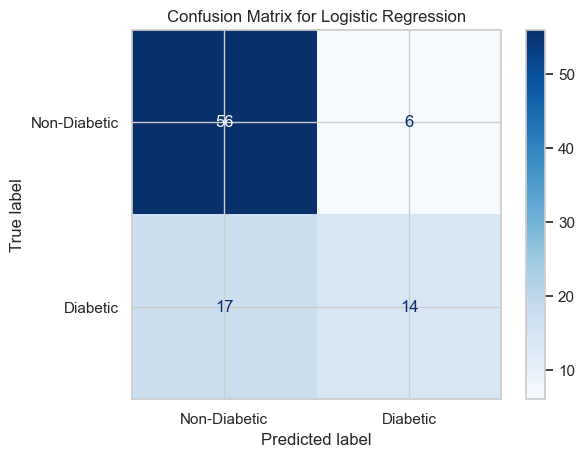

In [75]:
# Generate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_final)

# Display confusion matrix
plt.figure(figsize=(6, 6))
disp = ConfusionMatrixDisplay(conf_matrix, display_labels=["Non-Diabetic", "Diabetic"])
disp.plot(cmap="Blues", values_format="d")

plt.title("Confusion Matrix for Logistic Regression")
plt.show()

- ##### True Labels (Rows):
The rows represent the actual classes of the data. In this case, the classes are "Non-Diabetic" and "Diabetic."
- ##### Predicted Labels (Columns):
The columns represent the classes predicted by the model.
- ##### Diagonal Values:
The diagonal elements (55 and 13) represent correct predictions.
The number of Non-Diabetic patients correctly classified as Non-Diabetic (True Negative: 55).
The number of Diabetic patients correctly classified as Diabetic (True Positive: 15).
- ##### Off-Diagonal Values:
The off-diagonal elements (7 and 18) represent incorrect predictions.
The number of Non-Diabetic patients incorrectly classified as Diabetic (False Positive: 7).
The number of Diabetic patients incorrectly classified as Non-Diabetic (False Negative: 16).

##### Step 12: ROC Curve & AUC Score
The ROC Curve (Receiver Operating Characteristic) measures how well the model distinguishes between positive (diabetic) and negative (non-diabetic) cases.


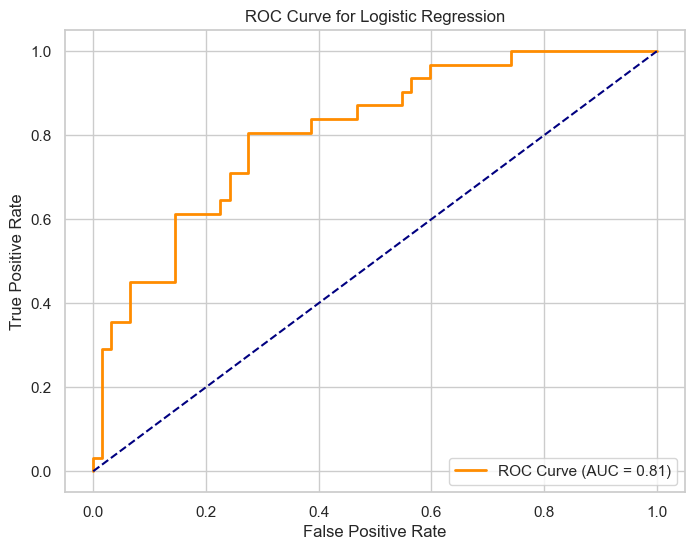

In [78]:
# Calculate ROC curve values
fpr, tpr, thresholds = roc_curve(y_test, grid_search.best_estimator_.predict_proba(X_test)[:,1])

# Compute AUC score (higher is better)
roc_auc = auc(fpr, tpr)

# Plot ROC Curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color="darkorange", lw=2, label=f"ROC Curve (AUC = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], color="navy", linestyle="--")  # Random model reference
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve for Logistic Regression")
plt.legend(loc="lower right")
plt.show()

#### A higher AUC (closer to 1) means a strong model.
##### This simply means the model we created is strong having a value of 0.80 , which is 80% accuracy.



#### Conclusion 

We strongly believe this machine learning model can be used in creation of a software application that can help in early detection of diabetes . 